In [17]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

C:\Users\19713\AppData\Local\Temp\ipykernel_7336\478424401.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x): 
    return datetime.strptime('190' + x, '%Y-%m')

In [13]:
series = read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_shampoo.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)

C:\Users\19713\AppData\Local\Temp\ipykernel_7336\1644301255.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_shampoo.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)


In [14]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

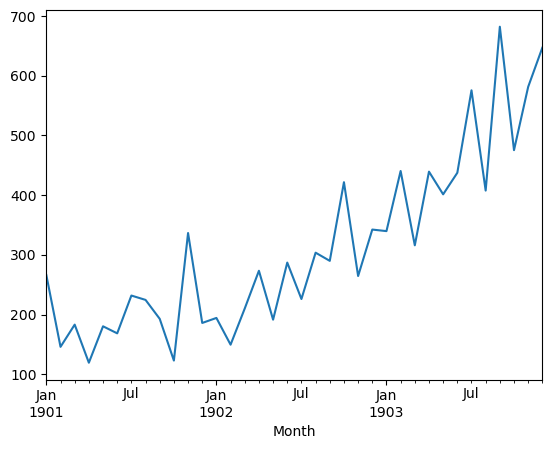

In [15]:
series.plot()
pyplot.show()

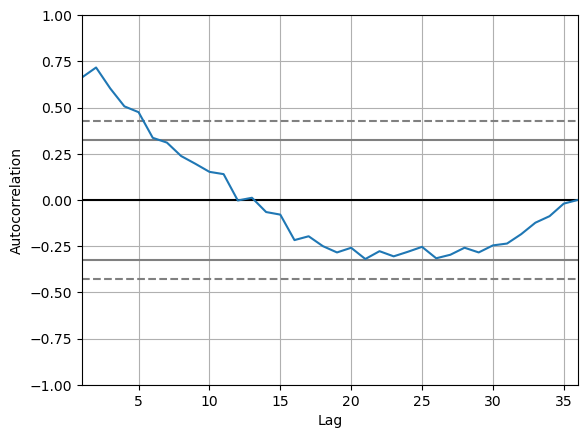

In [18]:
autocorrelation_plot(series)
pyplot.show()

In [20]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_shampoo.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


C:\Users\19713\AppData\Local\Temp\ipykernel_7336\2191208868.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\19713\AppData\Local\Temp\ipykernel_7336\2191208868.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_shampoo.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 30 Aug 2023   AIC                            408.969
Time:                        12:13:03   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

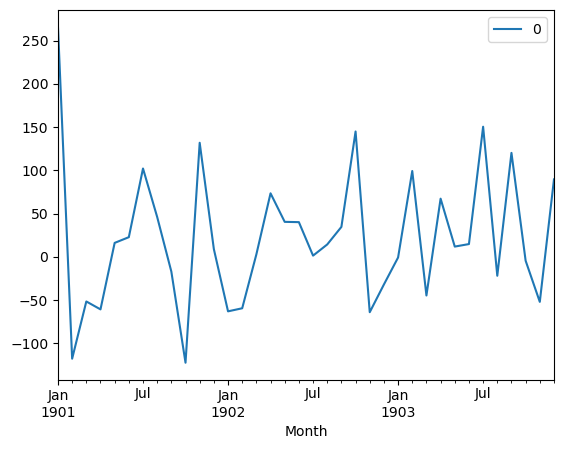

In [21]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

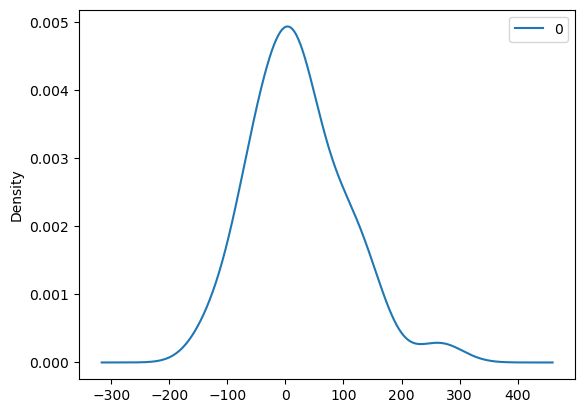

In [22]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [23]:
# summary stats of residuals
print(residuals.describe())

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


The results show that there is a bias in the prediction (a non-zero mean in the residuals).

In [27]:

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_shampoo.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))



C:\Users\19713\AppData\Local\Temp\ipykernel_7336\4047927607.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\19713\AppData\Local\Temp\ipykernel_7336\4047927607.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_shampoo.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365673, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


In [25]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 89.021


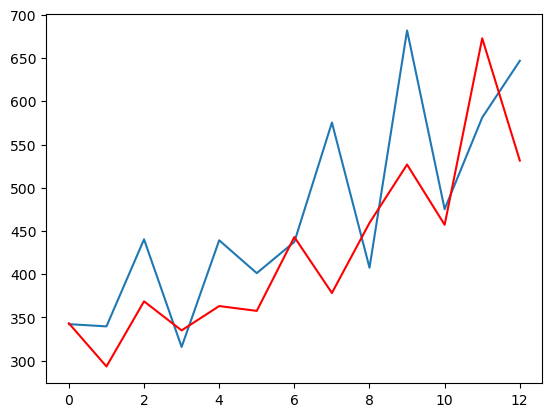

In [26]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

The expected values are in blue anad the rolling forecast predictions are in red. The values show some trend are are in the correct scale. The model could use further tuning of the p, d, and maybe even the q parameters.